# Contents:
Set Up

Creating Regions: 

Excluding Low Activity Users

Customer Profiling: Age, Income, family structure, select departments

Profile Distribution Visuals: Age, Income, family structure, select departments

Profile Aggregates: user spending max, min, mean by Age, Income, family structure

Regional and Departmental Comparisons: Age, Income, family structure

## Set Up

In [2]:
#setup
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
path = r"C:\Users\irkat\OneDrive - University of North Carolina at Charlotte\Desktop\Data Cert\A4"

In [3]:
#import data subset for analysis
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared', 'small_subset.pkl'))

In [4]:
df.shape

(9721098, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9721098 entries, 0 to 32404850
Data columns (total 28 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   order_number            int64  
 2   orders_day_of_week      int64  
 3   order_time              int64  
 4   days_since_prior_order  float64
 5   reordered               int64  
 6   product_name            object 
 7   aisle_id                int64  
 8   department_id           int64  
 9   prices                  float64
 10  price_range_loc         object 
 11  busy_day                object 
 12  busiest_days            object 
 13  busy_time               object 
 14  busy_times              object 
 15  max_order               int64  
 16  loyalty_flag            object 
 17  user_spending_mean      float64
 18  spending_flag           object 
 19  days_median             float64
 20  order_frequency_flag    object 
 21  gender                  object 
 22

### Q2: there is no PI data. names were removed previously

## Q3: Creating Regions

In [6]:
northeast = ['Maine','New Hampshire', 'New York','Vermont', 'New Jersey', 'Massachusetts', 'Rhode Island','Pennsylvania','Connecticut']

In [7]:
df.loc[(df['state'].isin(northeast)), 'Region'] = 'Northeast'

In [8]:
midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio', 'North Dakota', 'South Dakota', 'Kansas','Nebraska','Minnesota','Iowa','Missouri']

In [9]:
df.loc[(df['state'].isin(midwest)), 'Region'] = 'Midwest'

In [10]:
south = ['Delaware','Maryland','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','District of Columbia','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [11]:
df.loc[(df['state'].isin(south)), 'Region'] = 'South'

In [12]:
west = ['Idaho','Montana','California','Nevada','New Mexico','Colorado','Oregon','Washington','Wyoming','Utah','Arizona','Alaska','Hawaii']

In [13]:
df.loc[(df['state'].isin(west)), 'Region'] = 'West'

In [14]:
#checking for NA
df.loc[(df['Region'].isnull())]

,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,reordered,product_name,aisle_id,department_id,prices,...,days_median,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,Region


In [15]:
crosstab = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)

In [16]:
crosstab # the south is home to the most highspenders and the most spenders overall

spending_flag,High spender,Low spender
Region,,
Midwest,46352,2231799
Northeast,32401,1682946
South,62680,3175953
West,48232,2440735


## Q4: Excluding Low Activity Users

In [17]:
#create flag
df.loc[df['max_order'] < 5, 'activity_exculsion_flag'] = 'Low Activity'

In [18]:
#creating data frame of low activity users
excluded = df.loc[df['activity_exculsion_flag']=='Low Activity']

In [19]:
excluded.value_counts('activity_exculsion_flag')

activity_exculsion_flag
Low Activity    432345
Name: count, dtype: int64

In [20]:
#exporting low activity df
excluded.to_pickle(os.path.join(path, '02 Data','Prepared', 'excluded_low_activity.pkl'))

In [21]:
#new data frame without low activity
df_high_spenders = df.loc[df['activity_exculsion_flag'].isnull()]

In [22]:
df.shape

(9721098, 30)

In [23]:
excluded.shape

(432345, 30)

In [24]:
df_high_spenders.shape

(9288753, 30)

In [25]:
432345+9288753


9721098

## Customer Profiling

### Age

In [26]:
#identify age groups
df_high_spenders['age'].describe()

count    9.288753e+06
mean     4.946479e+01
std      1.848503e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [27]:
df_high_spenders.loc[(df_high_spenders['age'] >= 18) & (df_high_spenders['age']<33), 'age_category'] = '18-32'

C:\Users\irkat\AppData\Local\Temp\ipykernel_4876\2960488532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_spenders.loc[(df_high_spenders['age'] >= 18) & (df_high_spenders['age']<33), 'age_category'] = '18-32'


In [28]:
df_high_spenders.loc[(df_high_spenders['age'] >= 33) & (df_high_spenders['age']<49), 'age_category'] = '33-48'

In [29]:
df_high_spenders.loc[(df_high_spenders['age'] >= 49) & (df_high_spenders['age']<65), 'age_category'] = '39-64'

In [30]:
df_high_spenders.loc[(df_high_spenders['age'] >= 65), 'age_category'] = '65+'

In [31]:
df_high_spenders['age_category'].value_counts().sum()

9288753

### Income

In [32]:
#identify income groups
df_high_spenders['income'].describe()

count    9.288753e+06
mean     9.966777e+04
std      4.311731e+04
min      2.590300e+04
25%      6.730400e+04
50%      9.676500e+04
75%      1.281030e+05
max      5.939010e+05
Name: income, dtype: float64

In [33]:
df_high_spenders.loc[(df_high_spenders['income'] >= 25000) & (df_high_spenders['income']< 67000), 'Income_Category'] = 'Low Income'

C:\Users\irkat\AppData\Local\Temp\ipykernel_4876\2332224542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_spenders.loc[(df_high_spenders['income'] >= 25000) & (df_high_spenders['income']< 67000), 'Income_Category'] = 'Low Income'


In [34]:
df_high_spenders.loc[(df_high_spenders['income'] >= 67000) & (df_high_spenders['income']< 97000), 'Income_Category'] = 'Low Mid Income'

In [35]:
df_high_spenders.loc[(df_high_spenders['income'] >= 97000) & (df_high_spenders['income']< 120000), 'Income_Category'] = 'High Mid Income'

In [36]:
df_high_spenders.loc[(df_high_spenders['income'] >= 120000), 'Income_Category'] = 'High Income'

In [37]:
df_high_spenders['Income_Category'].value_counts().sum()

9288753

### Dependants and Fam Status

In [38]:
df_high_spenders['fam_status'].value_counts()

fam_status
married                             6524088
single                              1528126
divorced/widowed                     792172
living with parents and siblings     444367
Name: count, dtype: int64

In [39]:
df_high_spenders['n_dependants'].value_counts()

n_dependants
3    2331455
2    2320491
0    2320298
1    2316509
Name: count, dtype: int64

In [40]:
df_high_spenders.loc[(df_high_spenders['fam_status'] == 'married') & (df_high_spenders['n_dependants'] == 0), 'Fam_Catagory'] = 'Married No Children'

C:\Users\irkat\AppData\Local\Temp\ipykernel_4876\362671156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_spenders.loc[(df_high_spenders['fam_status'] == 'married') & (df_high_spenders['n_dependants'] == 0), 'Fam_Catagory'] = 'Married No Children'


In [41]:
df_high_spenders.loc[(df_high_spenders['fam_status'] == 'married') & (df_high_spenders['n_dependants'] == 1), 'fam_category'] = 'Married One Child'

C:\Users\irkat\AppData\Local\Temp\ipykernel_4876\750468625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_spenders.loc[(df_high_spenders['fam_status'] == 'married') & (df_high_spenders['n_dependants'] == 1), 'fam_category'] = 'Married One Child'


In [42]:
df_high_spenders.loc[(df_high_spenders['fam_status'] == 'married') & (df_high_spenders['n_dependants'] > 1), 'fam_category'] = 'Married Mult Children'

In [43]:
df_high_spenders.loc[(df_high_spenders['fam_status'] == 'single') & (df_high_spenders['n_dependants'] == 0), 'fam_category'] = 'Single No Kids'

In [44]:
df_high_spenders.loc[(df_high_spenders['fam_status'] == 'single') & (df_high_spenders['n_dependants'] == 1), 'fam_category'] = 'Single One Kids'

In [45]:
df_high_spenders.loc[(df_high_spenders['fam_status'] == 'single') & (df_high_spenders['n_dependants'] >2), 'fam_category'] = 'Single Mult Kids'

In [46]:
df_high_spenders.loc[(df_high_spenders['fam_status'] == 'divorced/widowed') & (df_high_spenders['n_dependants'] ==0), 'fam_category'] = 'Formerly Married No Kids'

In [47]:
df_high_spenders.loc[(df_high_spenders['fam_status'] == 'divorced/widowed') & (df_high_spenders['n_dependants'] ==1), 'fam_category'] = 'Formerly Married One Kid'

In [48]:
df_high_spenders.loc[(df_high_spenders['fam_status'] == 'divorced/widowed') & (df_high_spenders['n_dependants'] >1), 'fam_category'] = 'Formerly Married Mult Kid'

In [49]:
df_high_spenders.loc[(df_high_spenders['fam_status'] == 'living with parents and siblings') & (df_high_spenders['n_dependants'] ==0), 'fam_category'] = 'Dependent'

In [50]:
df_high_spenders.loc[(df_high_spenders['fam_status'] == 'living with parents and siblings') & (df_high_spenders['n_dependants'] >=1), 'fam_category'] = 'Three Gen Household'

In [51]:
df_high_spenders['fam_category'].value_counts().sum()

9288753

### Departments

Merging Deparment DF

In [52]:
#import
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'departments_wrangled.csv'))

In [53]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [54]:
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [55]:
#renaming index column
departments = departments.rename(columns = {'Unnamed: 0' : 'department_id'})

In [56]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [57]:
#merge
df_high_spenders = df_high_spenders.merge(departments, on = 'department_id')

In [58]:
df_high_spenders.department.value_counts().sum()

9288753

Department Profiling

In [59]:
df_high_spenders.department.value_counts()

department
produce            2722654
dairy eggs         1552723
snacks              830154
beverages           771110
frozen              635865
pantry              534800
bakery              336773
canned goods        304203
deli                301126
dry goods pasta     246810
household           209871
meat seafood        201697
breakfast           201561
personal care       127486
babies              123527
international        76993
alcohol              43550
pets                 27933
missing              19458
other                10378
bulk                 10081
Name: count, dtype: int64

In [60]:
#consume alcohol
df_high_spenders.loc[(df_high_spenders['department'] == 'alcohol'), 'Department_Profile'] = 'Consumes Alcohol'

In [61]:
#have baby
df_high_spenders.loc[(df_high_spenders['department'] == 'babie'), 'Department_Profile'] = 'Has Baby'

In [62]:
#have pet
df_high_spenders.loc[(df_high_spenders['department'] == 'pets'), 'Department_Profile'] = 'Has Pet'

In [63]:
#eat meat
df_high_spenders.loc[(df_high_spenders['department'] == 'meat seafood'), 'Department_Profile'] = 'Eats Meat'

In [64]:
#buy bulk
df_high_spenders.loc[(df_high_spenders['department'] == 'bulk'), 'Department_Profile'] = 'Buys Bulk'

In [65]:
df_high_spenders.Department_Profile.value_counts().sum()

283261

## Q6 Profile Distribution Visuals

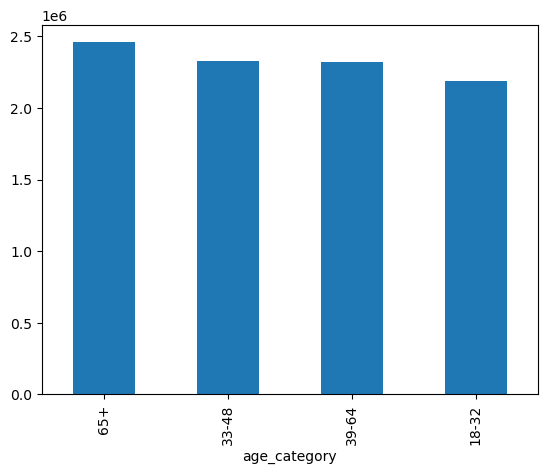

In [66]:
#age distribution - even because categories are based on distribution
bar = df_high_spenders['age_category'].value_counts().plot.bar()

In [67]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'bar_age_distribution.png'))

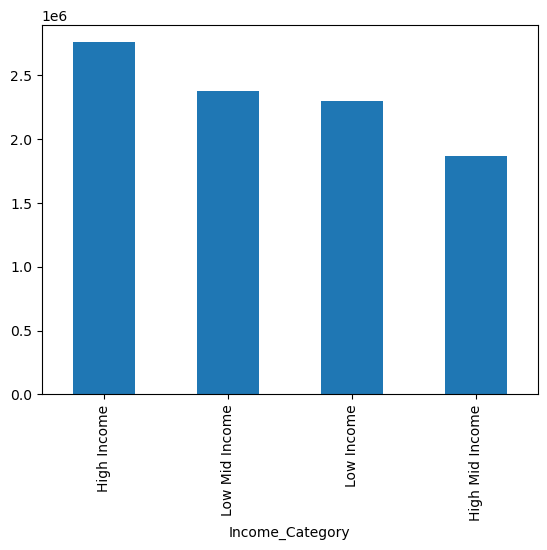

In [68]:
#icnome distribution - even because categories are based on distribution
bar = df_high_spenders['Income_Category'].value_counts().plot.bar()

In [69]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'income_cat_distribution.png'))

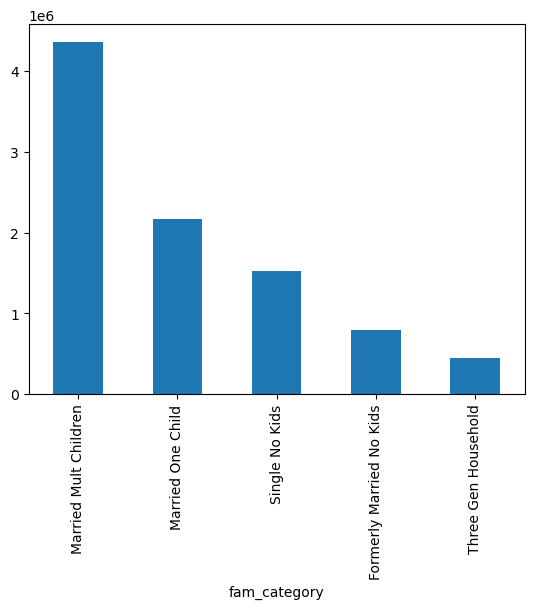

In [70]:
# distribution - most customers are married with more then one child. there are no customers single with children or divorced/widowed  with chiuldren
bar = df_high_spenders['fam_category'].value_counts().plot.bar()

In [71]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'fam_category_distr.png'))

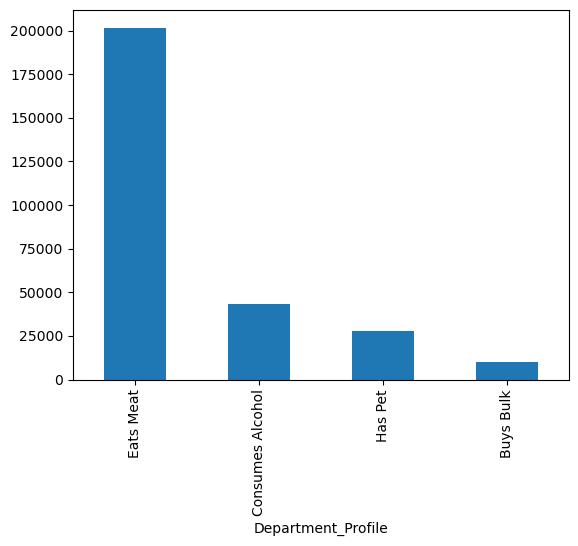

In [72]:
#select department profiles - many customers purchase meat. 
bar = df_high_spenders['Department_Profile'].value_counts().plot.bar()

In [73]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'dep_distr.png'))

## Q7 Profile Aggregates

In [74]:
#age groups buy at same frequency, oldest age groups make higher signle purchases
df_high_spenders.groupby('age_category').agg({'user_spending_mean': ['max','mean','min'], 'days_median': ['max','mean','min']})

user_spending_mean                      days_median            \
                            max       mean       min         max      mean   
age_category                                                                 
18-32              10209.987755  12.006269  1.628571        30.0  9.708631   
33-48               6983.593023  11.985670  1.000000        30.0  9.665850   
39-64              15006.940000  11.924518  1.000000        30.0  9.701273   
65+                14042.512281  11.787687  1.262500        30.0  9.652670   

                   
              min  
age_category       
18-32         0.0  
33-48         0.0  
39-64         0.0  
65+           0.0

In [75]:
#all families purchase at the same frequency and spend around the same amount, houses without kids make the largest single purchases
df_high_spenders.groupby('fam_category').agg({'user_spending_mean': ['max','mean','min'], 'days_median': ['max','mean','min']})

user_spending_mean                      days_median  \
                                        max       mean       min         max   
fam_category                                                                   
Formerly Married No Kids       14042.512281  11.608128  1.308333        30.0   
Married Mult Children           7414.485185  12.091049  1.000000        30.0   
Married One Child               6983.593023  11.603814  1.300000        30.0   
Single No Kids                 15006.940000  12.384270  1.000000        30.0   
Three Gen Household            10209.987755  10.801136  2.133333        30.0   

                                         
                              mean  min  
fam_category                             
Formerly Married No Kids  9.600508  0.0  
Married Mult Children     9.697023  0.0  
Married One Child         9.696115  0.0  
Single No Kids            9.684109  0.0  
Three Gen Household       9.588449  0.0

In [76]:
#as expected high income earners spend more, though not necessarily more frequently
df_high_spenders.groupby('Income_Category').agg({'user_spending_mean': ['max','mean','min'], 'days_median': ['max','mean','min']})

user_spending_mean                 days_median               
                               max       mean  min         max      mean  min
Income_Category                                                              
High Income           15006.940000  19.984069  7.0        30.0  9.588853  0.0
High Mid Income        5135.893590   9.822050  7.0        30.0  9.650235  0.0
Low Income               21.272202   7.301066  1.0        30.0  9.923225  0.0
Low Mid Income         3453.431034   8.694283  7.0        30.0  9.578656  0.0

## Q8 Regional and Deparments Comparisons

In [77]:
cross = pd.crosstab(df_high_spenders['Region'], df_high_spenders['age_category'], dropna = False)

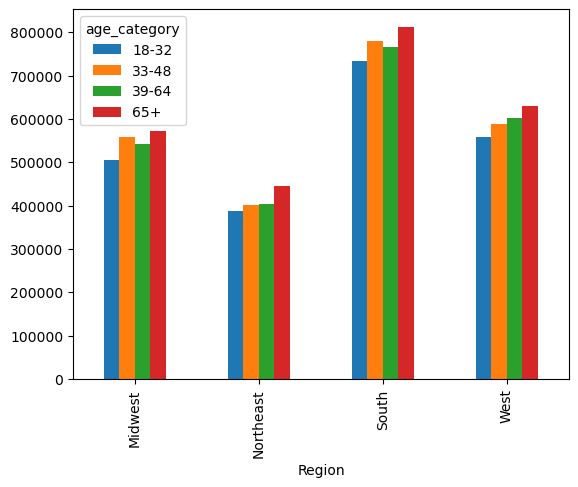

In [78]:
bar = cross.plot.bar()

In [79]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'age_region_bar.png'))

In [80]:
cross = pd.crosstab(df_high_spenders['Region'], df_high_spenders['Income_Category'], dropna = False)

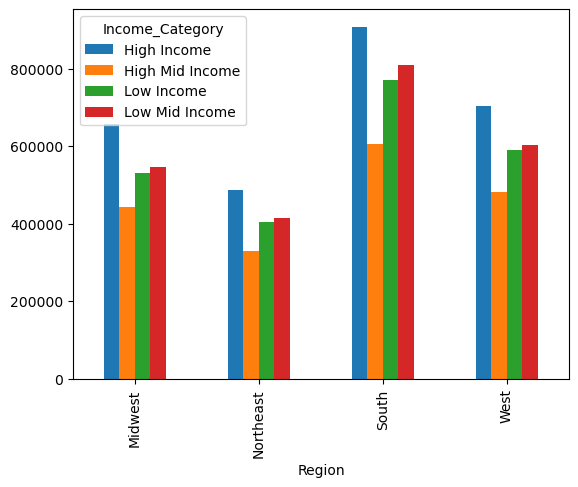

In [81]:
bar = cross.plot.bar()

In [82]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'income_region_bar.png'))

In [83]:
cross = pd.crosstab(df_high_spenders['Region'], df_high_spenders['fam_category'], dropna = False)

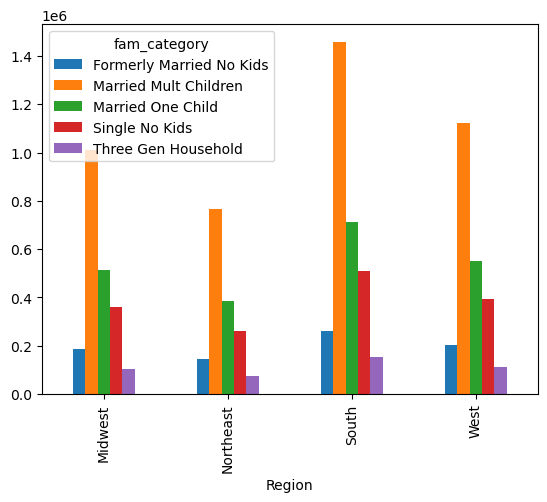

In [84]:
bar = cross.plot.bar()

In [85]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'fam_region_bar.png'))

In [86]:
cross = pd.crosstab(df_high_spenders['department'], df_high_spenders['age_category'], dropna = False)

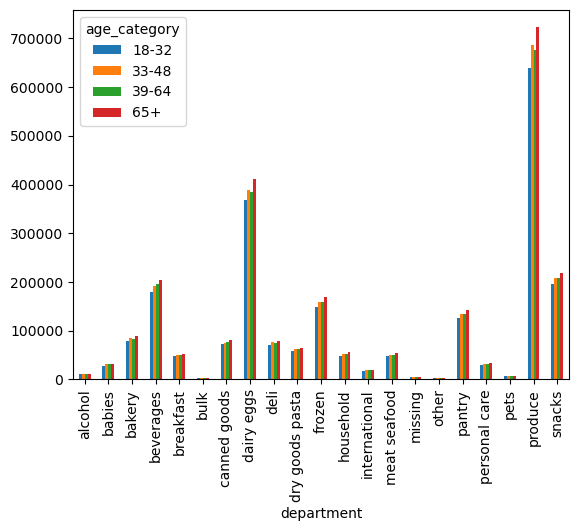

In [87]:
bar = cross.plot.bar()

In [88]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'age_dep_bar.png'))

In [89]:
cross = pd.crosstab(df_high_spenders['department'], df_high_spenders['Income_Category'], dropna = False)

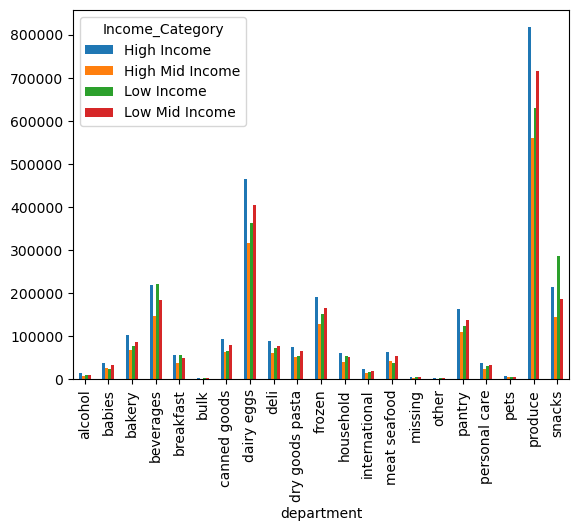

In [90]:
bar = cross.plot.bar()

In [91]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'income_dep_bar.png'))

In [92]:
cross = pd.crosstab(df_high_spenders['department'], df_high_spenders['fam_category'], dropna = False)

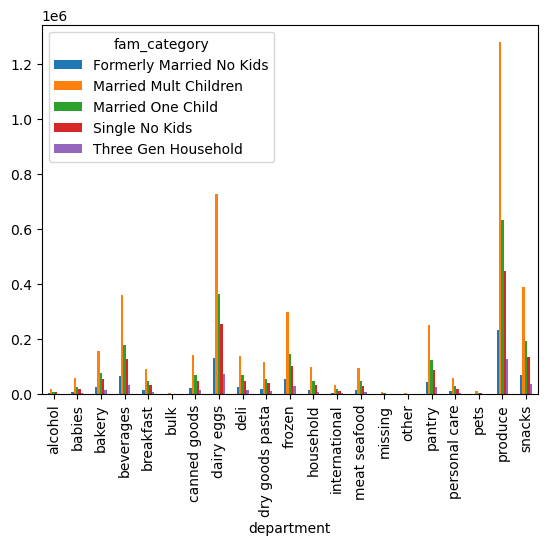

In [93]:
bar = cross.plot.bar()

In [94]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visuals', 'fam_dep_bar.png'))

In [95]:
cross = pd.crosstab(df_high_spenders['loyalty_flag'], df_high_spenders['fam_category'], dropna = False)

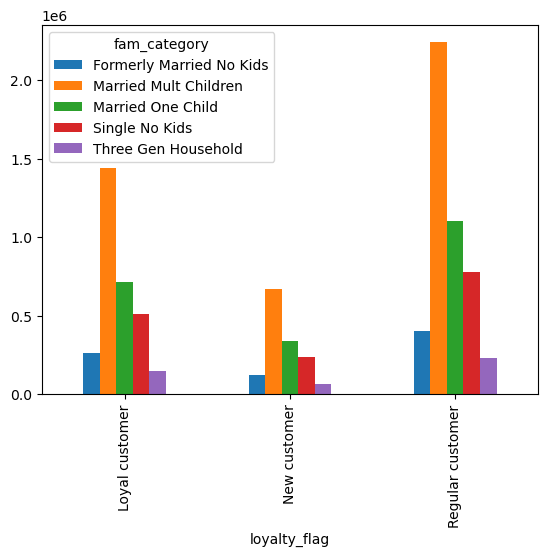

In [97]:
bar = cross.plot.bar()

In [102]:
cross = pd.crosstab(df_high_spenders['loyalty_flag'], df_high_spenders['Income_Category'], dropna = False)

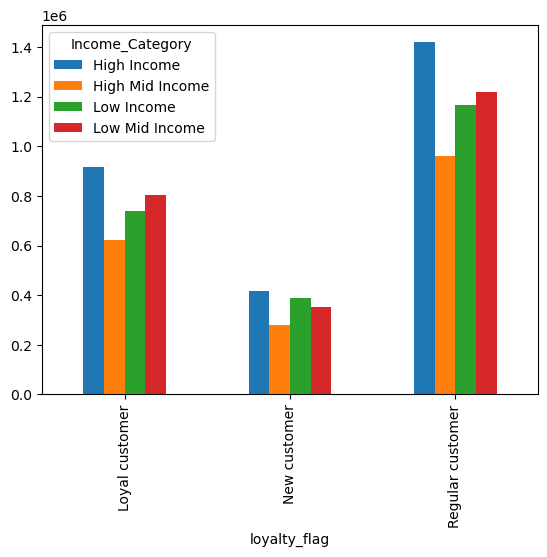

In [103]:
bar = cross.plot.bar()

In [104]:
cross = pd.crosstab(df_high_spenders['loyalty_flag'], df_high_spenders['Region'], dropna = False)

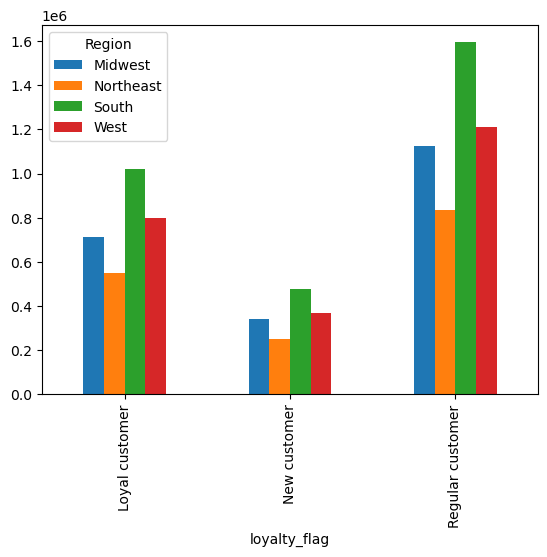

In [105]:
bar = cross.plot.bar()

In [106]:
cross = pd.crosstab(df_high_spenders['loyalty_flag'], df_high_spenders['age_category'], dropna = False)

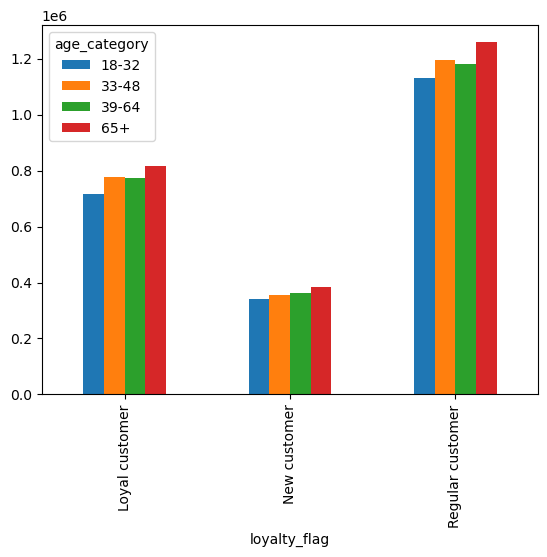

In [107]:
bar = cross.plot.bar()

In [113]:
cross = pd.crosstab(df_high_spenders['department'], df_high_spenders['loyalty_flag'], dropna = False)

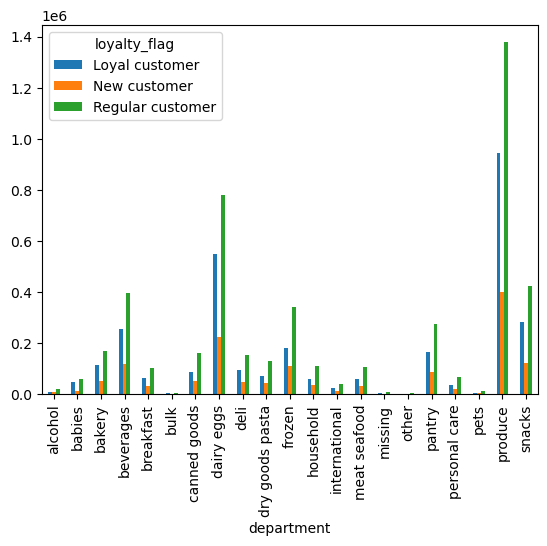

In [114]:
bar = cross.plot.bar()

In [96]:
#export
df_high_spenders.to_pickle(os.path.join(path, '02 Data','Prepared', 'small_high_spenders.pkl'))

#### 